# API

## Objective of activity:

> Get Beer recipes data via rest api from https://punkapi.com/documentation/v2
> There is no authentication and it relies on rate limits from IP addresses 1 req/sec; 3600 requests per hour so be mindful :)

## Importing library

In [1]:
import requests

## Making a data request to a url

In [2]:
# Root Endpoint
BASE_URL = "https://api.punkapi.com/v2/"
# query data with GET - get all beers as json
response = requests.get(f'{BASE_URL}/beers')

## Examining Response Code

> Anything starting with 2 shows success while 4 shows error

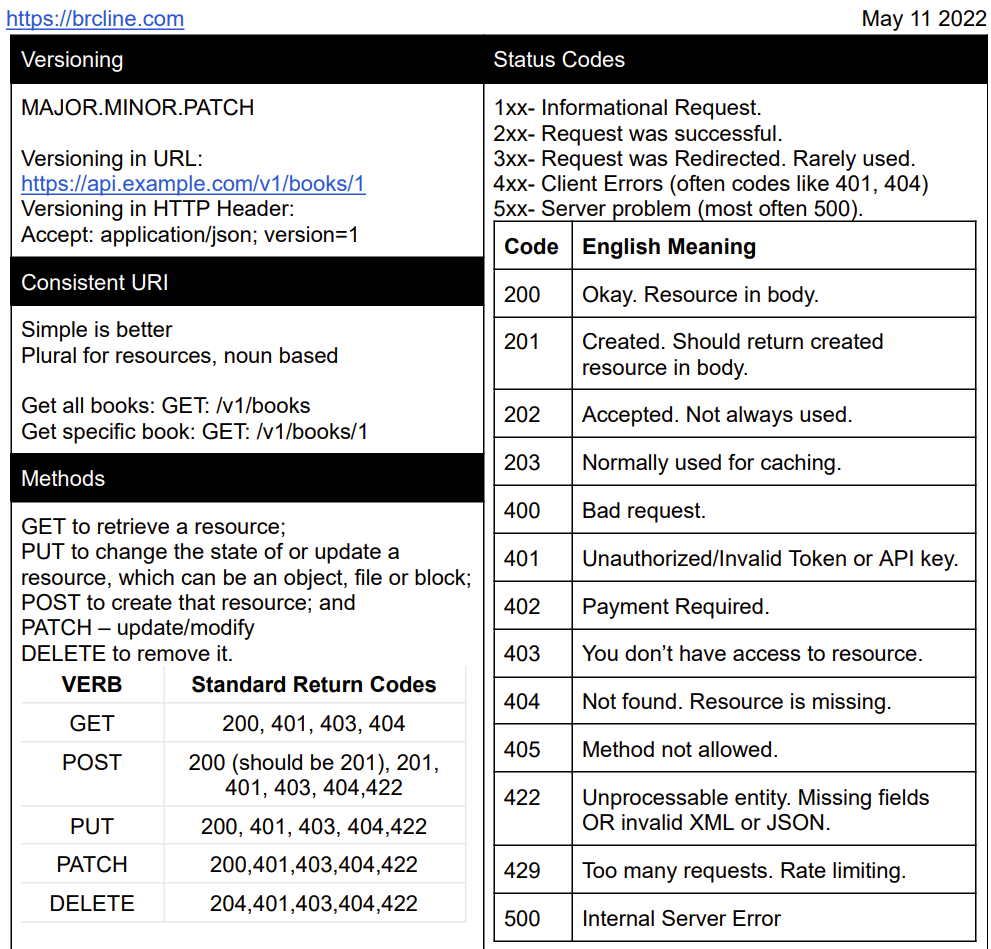

In [3]:
print(response.status_code)

200


## Get Response's headers

> Response header provides information about the file that was accessed including when it was accessed

In [4]:
print(response.headers)

{'Date': 'Thu, 29 Jun 2023 14:04:29 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'access-control-allow-credentials': 'true', 'access-control-allow-origin': '*', 'access-control-expose-headers': 'x-ratelimit-limit,x-ratelimit-remaining,content-length,origin,content-type,accept', 'age': '1712161', 'Cache-Control': 'public, max-age=14400, must-revalidate', 'etag': 'W/"b763-uq9mCpw3GfGLWVDAEjtO7T6F6Ng"', 'strict-transport-security': 'max-age=15552000; includeSubDomains', 'x-content-type-options': 'nosniff', 'x-dns-prefetch-control': 'off', 'x-download-options': 'noopen', 'x-frame-options': 'SAMEORIGIN', 'x-ratelimit-limit': '3600', 'x-ratelimit-remaining': '3346', 'x-ratelimit-reset': '1675622319', 'x-vercel-cache': 'MISS', 'x-vercel-id': 'iad1::sfo1::xnl4p-1675620837219-5be6e3591853', 'x-xss-protection': '1; mode=block', 'CF-Cache-Status': 'HIT', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/r

## Get Main Body of Response

> There is a builtin JSON decoder, in case you are dealing with JSON data

In [10]:
print(response.json())

[{'id': 1, 'name': 'Buzz', 'tagline': 'A Real Bitter Experience.', 'first_brewed': '09/2007', 'description': 'A light, crisp and bitter IPA brewed with English and American hops. A small batch brewed only once.', 'image_url': 'https://images.punkapi.com/v2/keg.png', 'abv': 4.5, 'ibu': 60, 'target_fg': 1010, 'target_og': 1044, 'ebc': 20, 'srm': 10, 'ph': 4.4, 'attenuation_level': 75, 'volume': {'value': 20, 'unit': 'litres'}, 'boil_volume': {'value': 25, 'unit': 'litres'}, 'method': {'mash_temp': [{'temp': {'value': 64, 'unit': 'celsius'}, 'duration': 75}], 'fermentation': {'temp': {'value': 19, 'unit': 'celsius'}}, 'twist': None}, 'ingredients': {'malt': [{'name': 'Maris Otter Extra Pale', 'amount': {'value': 3.3, 'unit': 'kilograms'}}, {'name': 'Caramalt', 'amount': {'value': 0.2, 'unit': 'kilograms'}}, {'name': 'Munich', 'amount': {'value': 0.4, 'unit': 'kilograms'}}], 'hops': [{'name': 'Fuggles', 'amount': {'value': 25, 'unit': 'grams'}, 'add': 'start', 'attribute': 'bitter'}, {'nam

## Visualizing JSON data better by converting it from Python Object to JSON data

In [11]:
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

[
    {
        "abv": 4.5,
        "attenuation_level": 75,
        "boil_volume": {
            "unit": "litres",
            "value": 25
        },
        "brewers_tips": "The earthy and floral aromas from the hops can be overpowering. Drop a little Cascade in at the end of the boil to lift the profile with a bit of citrus.",
        "contributed_by": "Sam Mason <samjbmason>",
        "description": "A light, crisp and bitter IPA brewed with English and American hops. A small batch brewed only once.",
        "ebc": 20,
        "first_brewed": "09/2007",
        "food_pairing": [
            "Spicy chicken tikka masala",
            "Grilled chicken quesadilla",
            "Caramel toffee cake"
        ],
        "ibu": 60,
        "id": 1,
        "image_url": "https://images.punkapi.com/v2/keg.png",
        "ingredients": {
            "hops": [
                {
                    "add": "start",
                    "amount": {
                        "unit": "grams",
        

In [12]:
all_beers = response.json()

# example of first dictionary entity in a list of beers
jprint(all_beers[0])

{
    "abv": 4.5,
    "attenuation_level": 75,
    "boil_volume": {
        "unit": "litres",
        "value": 25
    },
    "brewers_tips": "The earthy and floral aromas from the hops can be overpowering. Drop a little Cascade in at the end of the boil to lift the profile with a bit of citrus.",
    "contributed_by": "Sam Mason <samjbmason>",
    "description": "A light, crisp and bitter IPA brewed with English and American hops. A small batch brewed only once.",
    "ebc": 20,
    "first_brewed": "09/2007",
    "food_pairing": [
        "Spicy chicken tikka masala",
        "Grilled chicken quesadilla",
        "Caramel toffee cake"
    ],
    "ibu": 60,
    "id": 1,
    "image_url": "https://images.punkapi.com/v2/keg.png",
    "ingredients": {
        "hops": [
            {
                "add": "start",
                "amount": {
                    "unit": "grams",
                    "value": 25
                },
                "attribute": "bitter",
                "name": 

## GET with parameters in query string

One common way to customize a GET request is to pass values through query string parameters in the URL. 


API Query parameters can be defined as the optional key-value pairs that appear after the question mark in the URL


Query parameters are used to sort/filter resources

One of the parameter name is abv_gt number Returns all beers with ABV greater than the supplied number


Second parameter name is abv_lt number  Returns all beers with ABV less than the supplied number


So return me beer between 15 and 20 ABV

In [13]:
payload = {
    'abv_gt': 15,
    'abv_lt': 20
}
response = requests.get(f'{BASE_URL}/beers', params=payload)
print(response)

<Response [200]>


In [14]:
beers_between_20_and_15_percent = response.json()
jprint(beers_between_20_and_15_percent)

[
    {
        "abv": 16.5,
        "attenuation_level": 100,
        "boil_volume": {
            "unit": "litres",
            "value": 25
        },
        "brewers_tips": "The biggest challenge with this beer is getting it to ferment out entirely. Hold mash temp at 65\u00b0C for 90 mins to ensure maximum fermentability. Use super high gravity yeast or champagne yeast to achieve the last few gravity points.",
        "contributed_by": "Sam Mason <samjbmason>",
        "description": "About as far as you can push an IPA; Anarchist Alchemist packs in three times the malt and three of our favourite hops. Nelson Sauvin, Amarillo and Centennial bring a range of flavours, touching on tropical fruit, white grape, tangerine, grapefruit, pine, spiced orange... the list goes on!",
        "ebc": 20,
        "first_brewed": "03/2012",
        "food_pairing": [
            "Blue cheese & onion tart",
            "Goan goat curry",
            "Sugar-poached kumquat rice pudding"
        ],
  

## Url that we sent in a request

In [15]:
response.url

'https://api.punkapi.com/v2/beers?abv_gt=15&abv_lt=20'

In [16]:
print(len(beers_between_20_and_15_percent))

9


In [24]:
# List of all the keys
for i in beers_between_20_and_15_percent[0].keys():
    print(i, '\n')
print()

id 

name 

tagline 

first_brewed 

description 

image_url 

abv 

ibu 

target_fg 

target_og 

ebc 

srm 

ph 

attenuation_level 

volume 

boil_volume 

method 

ingredients 

food_pairing 

brewers_tips 

contributed_by 




In [23]:
# Lets get their names and alcohol percentages
short_summary_of_beers = [
    {
        "beer_name": beer.get("name"),
        "beer_alcohol": beer.get("abv")
    }
    for beer in beers_between_20_and_15_percent
]

for i in short_summary_of_beers:
    print(i, '\n')

{'beer_name': 'Anarchist Alchemist', 'beer_alcohol': 16.5} 

{'beer_name': 'Lumberjack Stout', 'beer_alcohol': 15.2} 

{'beer_name': "Bowman's Beard - B-Sides", 'beer_alcohol': 18.3} 

{'beer_name': 'Tokyo*', 'beer_alcohol': 16.2} 

{'beer_name': 'AB:02', 'beer_alcohol': 18} 

{'beer_name': 'Black Tokyo Horizon (w/Nøgne Ø & Mikkeller)', 'beer_alcohol': 17.2} 

{'beer_name': 'Dog D', 'beer_alcohol': 16.1} 

{'beer_name': 'Dog E', 'beer_alcohol': 16.1} 

{'beer_name': 'Dog G', 'beer_alcohol': 17} 



## GET with path parameter
> path parameters come before the question mark sign

> path parameters are used to identify a specific resource or resources.

> Our path parameter will be the beer id

> Gets a beer from the api using the beers id

In [25]:
beer_id = 1

response = requests.get(f'{BASE_URL}/beers/{beer_id}')
print(response.status_code)
# > 200
beer_no_1 = response.json()
print(len(beer_no_1))

200
1


In [30]:
print(beer_no_1)

[{'id': 1, 'name': 'Buzz', 'tagline': 'A Real Bitter Experience.', 'first_brewed': '09/2007', 'description': 'A light, crisp and bitter IPA brewed with English and American hops. A small batch brewed only once.', 'image_url': 'https://images.punkapi.com/v2/keg.png', 'abv': 4.5, 'ibu': 60, 'target_fg': 1010, 'target_og': 1044, 'ebc': 20, 'srm': 10, 'ph': 4.4, 'attenuation_level': 75, 'volume': {'value': 20, 'unit': 'litres'}, 'boil_volume': {'value': 25, 'unit': 'litres'}, 'method': {'mash_temp': [{'temp': {'value': 64, 'unit': 'celsius'}, 'duration': 75}], 'fermentation': {'temp': {'value': 19, 'unit': 'celsius'}}, 'twist': None}, 'ingredients': {'malt': [{'name': 'Maris Otter Extra Pale', 'amount': {'value': 3.3, 'unit': 'kilograms'}}, {'name': 'Caramalt', 'amount': {'value': 0.2, 'unit': 'kilograms'}}, {'name': 'Munich', 'amount': {'value': 0.4, 'unit': 'kilograms'}}], 'hops': [{'name': 'Fuggles', 'amount': {'value': 25, 'unit': 'grams'}, 'add': 'start', 'attribute': 'bitter'}, {'nam

In [34]:
for i in beer_no_1:
    for key,value in i.items():
        print(f'{key}: {value}', '\n')

id: 1 

name: Buzz 

tagline: A Real Bitter Experience. 

first_brewed: 09/2007 

description: A light, crisp and bitter IPA brewed with English and American hops. A small batch brewed only once. 

image_url: https://images.punkapi.com/v2/keg.png 

abv: 4.5 

ibu: 60 

target_fg: 1010 

target_og: 1044 

ebc: 20 

srm: 10 

ph: 4.4 

attenuation_level: 75 

volume: {'value': 20, 'unit': 'litres'} 

boil_volume: {'value': 25, 'unit': 'litres'} 

method: {'mash_temp': [{'temp': {'value': 64, 'unit': 'celsius'}, 'duration': 75}], 'fermentation': {'temp': {'value': 19, 'unit': 'celsius'}}, 'twist': None} 

ingredients: {'malt': [{'name': 'Maris Otter Extra Pale', 'amount': {'value': 3.3, 'unit': 'kilograms'}}, {'name': 'Caramalt', 'amount': {'value': 0.2, 'unit': 'kilograms'}}, {'name': 'Munich', 'amount': {'value': 0.4, 'unit': 'kilograms'}}], 'hops': [{'name': 'Fuggles', 'amount': {'value': 25, 'unit': 'grams'}, 'add': 'start', 'attribute': 'bitter'}, {'name': 'First Gold', 'amount': {'v

## Making a Post Request

In [35]:
# Lets change to a hosted REST-API ready to respond to your AJAX requests, so we can test POST requests
# API documentation = https://reqres.in/

# Lets first test one more GET request to request a single fake user
BASE_URL = "https://reqres.in/api"

response = requests.get(f"{BASE_URL}/users/2")
jprint(response.json())

{
    "data": {
        "avatar": "https://reqres.in/img/faces/2-image.jpg",
        "email": "janet.weaver@reqres.in",
        "first_name": "Janet",
        "id": 2,
        "last_name": "Weaver"
    },
    "support": {
        "text": "To keep ReqRes free, contributions towards server costs are appreciated!",
        "url": "https://reqres.in/#support-heading"
    }
}


## Write data with POST parameters in query string

In [36]:
# write data with POST (json data in body)

new_user = {
    "name": "New User",
    "job": "Data Engineer"
}

# Create a new user
response = requests.post(f"{BASE_URL}/users", data=new_user)
print(response)

<Response [201]>


In [37]:
# Created user
jprint(response.json())

{
    "createdAt": "2023-06-29T14:37:38.495Z",
    "id": "887",
    "job": "Data Engineer",
    "name": "New User"
}
